In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.ndimage as imfilter
import pandas as pd
import pickle
from crop_image import resize
from PIL import Image

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tqdm import tqdm

In [2]:
path_wiki = 'data/watches/ds3_crown/cleandata.csv'
path_imdb = 'data/watches/ds3_crown/images/'

In [3]:
def load_data(path_wiki, path_imdb):
    df = pd.read_csv(path_wiki, index_col=0)
    
    all_image_data = []
    all_label_data = []
    for index, row in tqdm(df.iterrows()):
        img = np.asarray(resize(Image.open(path_imdb + row["image_name"], 'r'), 255, 255).convert('L'))/255 # .flatten() #
        img = imfilter.sobel(img).flatten()
        all_image_data.append(img)
        all_label_data.append(row["price"])
    
    return all_image_data, all_label_data

In [4]:
### TIME INFORMATION: needs 10 Secounds to finish
all_image_data, all_label_data = load_data(path_wiki, path_imdb)

26228it [42:08, 10.37it/s]


In [5]:
### TIME INFORMATION: needs 4h on a i7-4790K 4GHz IMac
X_train, X_test, y_train, y_test = train_test_split(all_image_data, all_label_data, test_size=0.1, random_state=12)
rf = RandomForestRegressor(n_estimators=100, max_depth=10, verbose=2, n_jobs=10)
rf.fit(X_train, y_train)

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.


building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100


[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed: 73.1min


building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73

[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed: 243.0min finished


RandomForestRegressor(max_depth=10, n_jobs=10, verbose=2)

In [7]:
y_pred = rf.predict(X_test)
y_pred_train = rf.predict(X_train)
print(f"The R2 score of the model on the Test Data is: {r2_score(y_test, y_pred)}")
print(f"The R2 score of the model on the Train Data is: {r2_score(y_train, y_pred_train)}")

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


The R2 score of the model on the Test Data is: 0.3200160633749556
The R2 score of the model on the Train Data is: 0.747062597509696


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


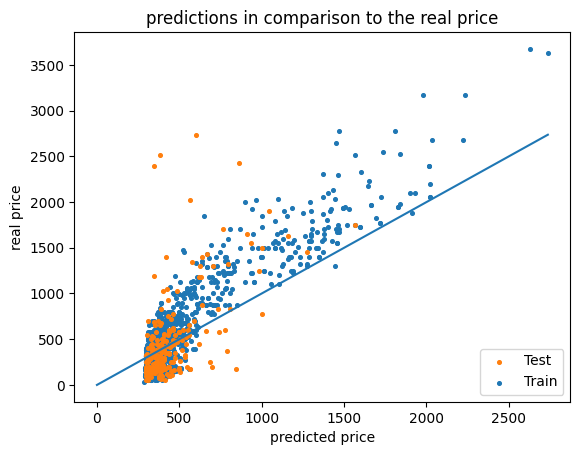

In [8]:
fig, ax = plt.subplots()

train = ax.scatter(y_pred_train, y_train, s=7, label ="Train")
test = ax.scatter(y_pred, y_test, s=7, label= "Test")

ax.plot([0,max(y_pred_train)], [0,max(y_pred_train)])
ax.set_ylabel('real price')
ax.set_xlabel('predicted price')
ax.set_title('predictions in comparison to the real price')

ax.legend(handles=[test, train], loc='lower right')

plt.show()

Interesting to see that there is a straight cut for cheaper watches the model predicts all watches are more expensive than 300 Dollar

In [9]:
print(f"Minimum predicted price: {min(y_pred)} Minimum real price: {min(y_test)}")

Minimum predicted price: 295.4081910460964 Minimum real price: 59.0


In [6]:
## save model to storage
with open("models/M1_RF_ds3.pickle", mode="wb") as out_file:
    pickle.dump(rf, out_file)

## Apply other Data on this Model

In [12]:
ds2_path_wiki = 'data/watches/ds2_marc/cleandata.csv'
ds2_path_imdb = 'data/watches/ds2_marc/images/'

In [13]:
all_image_ds2, all_label_ds2 = load_data(ds2_path_wiki, ds2_path_imdb)

244it [00:10, 22.71it/s]


In [14]:
y_pred_ds2 = rf.predict(all_image_ds2)
print(f"The R2 score on the Marc Gebauer Data is: {r2_score(all_label_ds2, y_pred_ds2)}")

The R2 score on the Marc Gebauer Data is: -0.31421031456568027


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


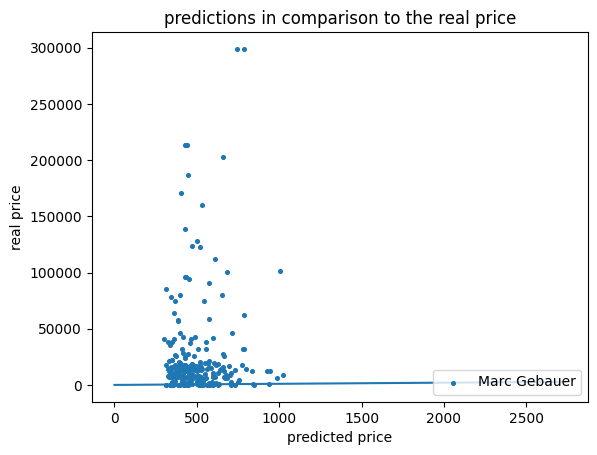

In [15]:
fig, ax = plt.subplots()

test = ax.scatter(y_pred_ds2, all_label_ds2, s=7, label ="Marc Gebauer")

ax.plot([0,max(y_pred_train)], [0,max(y_pred_train)])
ax.set_ylabel('real price')
ax.set_xlabel('predicted price')
ax.set_title('predictions in comparison to the real price')

ax.legend(handles=[test], loc='lower right')

plt.show()

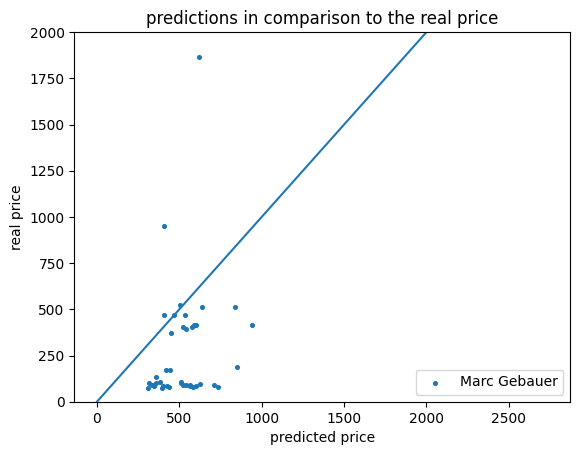

In [16]:
fig, ax = plt.subplots()

test = ax.scatter(y_pred_ds2, all_label_ds2, s=7, label ="Marc Gebauer")

ax.plot([0,max(y_pred_train)], [0,max(y_pred_train)])
ax.set_ylabel('real price')
ax.set_xlabel('predicted price')
ax.set_title('predictions in comparison to the real price')

ax.legend(handles=[test], loc='lower right')

ax.set_ylim(0, 2000)  

plt.show()

By taking a closer look at the cheaper watches you see that it is just luck of the model to predict the watches around 500 dollar the best because it always predicts in this range.